In [1]:
import pandas as pd

In [11]:
# filename = 'data/myfile.csv'
filename = 'data/crimes.csv'
# df = pd.read_csv(filename, encoding='utf-8')
df = pd.read_csv(filename, encoding='unicode_escape', header=1)


In [23]:
# print(df.head())
print(df.columns)

viranomaiset = df['Viranomainen'].unique()
rikokset = df['Päärikos tai muu asia'].unique()

print(viranomaiset)
print(rikokset)

# Sum all columns that start with 'Kesto' and add them to a new column 'Kesto yhteensä'
df['Kesto yhteensä'] = df.filter(regex='Kesto').sum(axis=1)

df['Kesto yhteensä'].describe()


Index(['Vuosi', 'Pakkokeino', 'Viranomainen', 'Päärikos tai muu asia',
       'Kesto alle 1 vrk', 'Kesto 1-1,9 vrk', 'Kesto 2-2,9 vrk',
       'Kesto 3-3,9 vrk', 'Kesto 4-4,9 vrk', 'Kesto 5-5,9 vrk',
       'Kesto 6-6,9 vrk', 'Kesto 1-1,9 viikkoa', 'Kesto 2-2,9 viikkoa',
       'Kesto 3 viikkoa', 'Kesto 1-1,9 kk', 'Kesto 2-2,9 kk',
       'Kesto 3 kk ja yli', 'Kesto ei tietoa', 'Kiinniotto vrk:t',
       'Pidätys vrk:t', 'Vankeus vrk:t', 'Ulkomaalaisen säilössäpito vrk:t'],
      dtype='object')
['Viranomaiset yhteensä' 'Keskusrikospoliisi' 'Helsingin poliisilaitos'
 'Länsi-Uudenmaan poliisilaitos' 'Itä-Uudenmaan poliisilaitos'
 'Hämeen poliisilaitos' 'Kaakkois-Suomen poliisilaitos'
 'Lounais-Suomen poliisilaitos' 'Sisä-Suomen poliisilaitos'
 'Pohjanmaan poliisilaitos' 'Itä-Suomen poliisilaitos'
 'Oulun poliisilaitos' 'Lapin poliisilaitos' 'Ahvenanmaan poliisilaitos']
['Rikokset, rikkomukset ja viranomaisten tehtävät yhteensä'
 'RIKOKSET JA RIKKOMUKSET YHTEENSÄ' '1 RIKOSLAKIRIKOKSET'
 

count    15120.000000
mean        74.879894
std        748.960921
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max      30186.000000
Name: Kesto yhteensä, dtype: float64

/tmp/ipykernel_2362824/23677440.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_viranomaiset = df[df['Viranomainen'] != 'Viranomaiset yhteensä'].groupby('Viranomainen').sum()


<AxesSubplot: title={'center': 'Viranomaisten rikosten kestot yhteensä'}, xlabel='Viranomainen'>

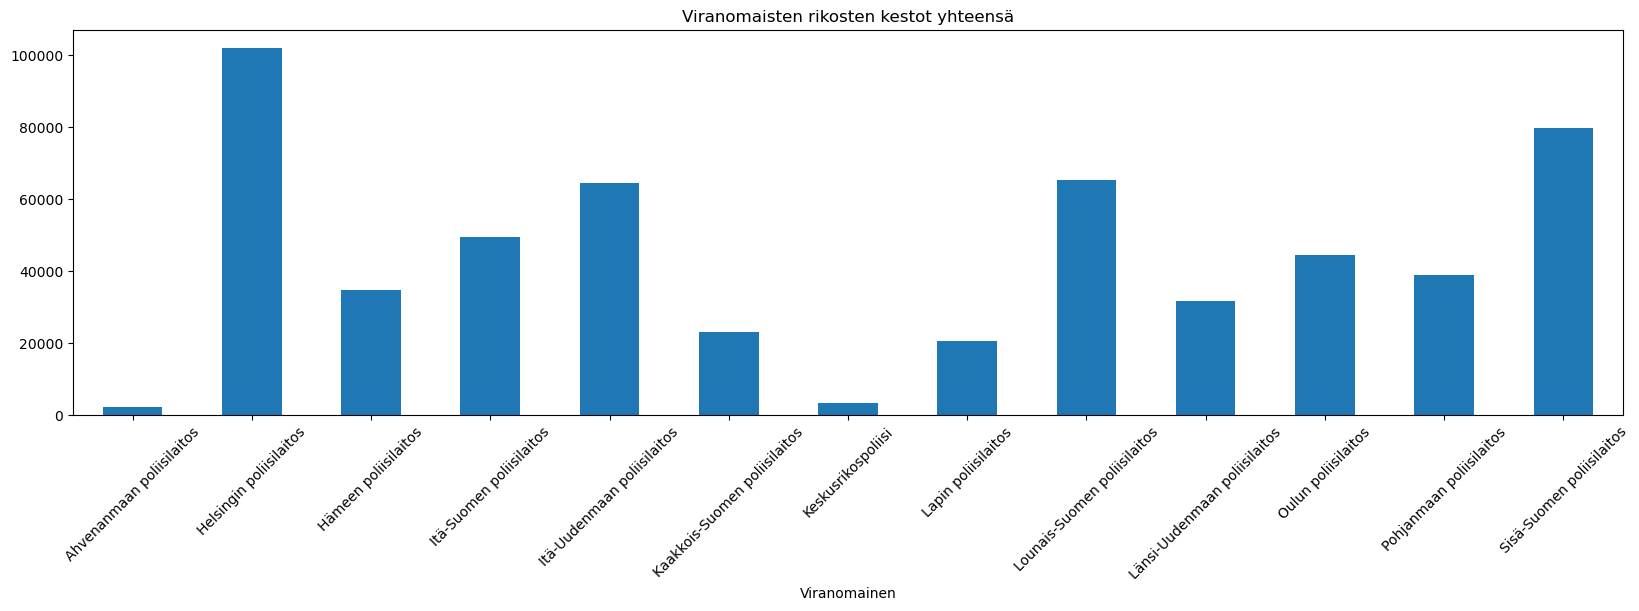

In [29]:
df_viranomaiset = df[df['Viranomainen'] != 'Viranomaiset yhteensä'].groupby('Viranomainen').sum()
df_viranomaiset['Kesto yhteensä'].plot(kind='bar', title='Viranomaisten rikosten kestot yhteensä', figsize=(20, 5), rot=45)

In [34]:
# 2D Heatmap of Viranomaiset (rows) and Päärikos tai muu asia (columns) with value coming from Kesto yhteensä
df_heatmap = df[df['Viranomainen'] != 'Viranomaiset yhteensä'][['Kesto yhteensä', 'Viranomainen', 'Päärikos tai muu asia']].groupby(['Viranomainen', 'Päärikos tai muu asia']).sum()
df_heatmap = df_heatmap.unstack(level=1)
df_heatmap.plot(kind='bar', title='Viranomaisten rikosten kestot yhteensä', figsize=(20, 5), rot=45)
    



<AxesSubplot: title={'center': 'Viranomaisten rikosten kestot yhteensä'}, xlabel='Viranomainen'>